In [102]:
# Import necessary items
import pandas as pd
%pip install scikit-learn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



Note: you may need to restart the kernel to use updated packages.


In [103]:
# Load the dataset 
data = pd.read_csv("car.data.txt", header=None)
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

print("Loaded dataset with", len(data) , "rows")
print(data.head()) # Display first few rows of the dataset to show it having loaded correctly

column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv('car.data.txt', header=None, names=column_names)

Loaded dataset with 1728 rows
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [104]:
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1)
y = df['class']

# Split the dataset into 80% training, 20% testing
XTrain, XTest, yTrain, yTest = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Displays the sizes of the training and test sets
print(f"Training set size: {len(XTrain)}")
print(f"Test set size: {len(XTest)}")


Training set size: 1382
Test set size: 346


In [105]:
# The first rule based AI implementation. Using simple if-else statements.
def classifyCar(buying, maint, doors, persons, lug_boot, safety):
    # The first rule filters cars that are of high safety, spacious for both seating capacity and boot space, and are not too expensive
    if safety == 'high' and lug_boot == 'big' and persons == 'more' and (buying in ['low', 'med']):
        return 'vgood'
    # The second rule filters cars that have medium safety and luggage space and 4 or more seats. 
    elif safety == 'med' and lug_boot == 'med' and persons in ['4', 'more']:
        return 'good'
    # The third rule filters out cars that are unsafe or contain too few seats, as well as those with small luggage space. 
    elif lug_boot == 'small' or safety == 'low' or persons == '2':
        return 'unacc'
    # The default value for cars that may not meet the first three rules are treated as acceptable but not outstanding
    else:
        return 'acc'
    
# Generate predictions for the test set using Algorithm 1
yPredAlgo1 = [
    classifyCar(*row)
    for row in XTest[['buying','maint','doors','persons','lug_boot','safety']].values
]

In [106]:
# The second rule based AI implementation. Using a list of rules to classify cars.
rules = [
    {"condition": lambda c: c["safety"] == "high" and c["persons"] == "more" and c["lug_boot"] == "big" and c["buying"] in ["low", "med"],
        "result": "vgood"},
    {"condition": lambda c: c["safety"] == "med" and c["lug_boot"] == "med" and c["persons"] in ["4", "more"],
        "result": "good"},
    {"condition": lambda c: c["safety"] == "low" or c["persons"] == "2" or c["lug_boot"] == "small",
        "result": "unacc"}
]
# The rules are stated above.

#The function below applies the rules to classify the car.
def ruleBasedAI(car):
    for rule in rules:
        if rule["condition"](car):
            return rule["result"]
    return "acc" # This is the default value if no rules match.

# Generate predictions for the test set using Algorithm 2
yPredAlgo2 = [ruleBasedAI(row) for _, row in XTest.iterrows()]

In [107]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Display results for both algorithms
print("Algorithm 1 Results")
print("Accuracy:", accuracy_score(yTest, yPredAlgo1))
print(classification_report(yTest, yPredAlgo1))
print(confusion_matrix(yTest, yPredAlgo1))

print("\nAlgorithm 2 Results")
print("Accuracy:", accuracy_score(yTest, yPredAlgo2))
print(classification_report(yTest, yPredAlgo2))
print(confusion_matrix(yTest, yPredAlgo2))


Algorithm 1 Results
Accuracy: 0.7514450867052023
              precision    recall  f1-score   support

         acc       0.55      0.48      0.51        77
        good       0.15      0.29      0.20        14
       unacc       0.88      0.90      0.89       242
       vgood       0.33      0.15      0.21        13

    accuracy                           0.75       346
   macro avg       0.48      0.45      0.45       346
weighted avg       0.76      0.75      0.75       346

[[ 37  12  24   4]
 [  5   4   5   0]
 [ 14  11 217   0]
 [ 11   0   0   2]]

Algorithm 2 Results
Accuracy: 0.7514450867052023
              precision    recall  f1-score   support

         acc       0.55      0.48      0.51        77
        good       0.15      0.29      0.20        14
       unacc       0.88      0.90      0.89       242
       vgood       0.33      0.15      0.21        13

    accuracy                           0.75       346
   macro avg       0.48      0.45      0.45       346
weighted 

In [108]:
print("\n Summary")
print(f"Algorithm 1 accuracy: {accuracy_score(yTest, yPredAlgo1)*100:.2f}%")
print(f"Algorithm 2 accuracy: {accuracy_score(yTest, yPredAlgo2)*100:.2f}%")

#This section calculates and would show the accuracy of the model. 


 Summary
Algorithm 1 accuracy: 75.14%
Algorithm 2 accuracy: 75.14%


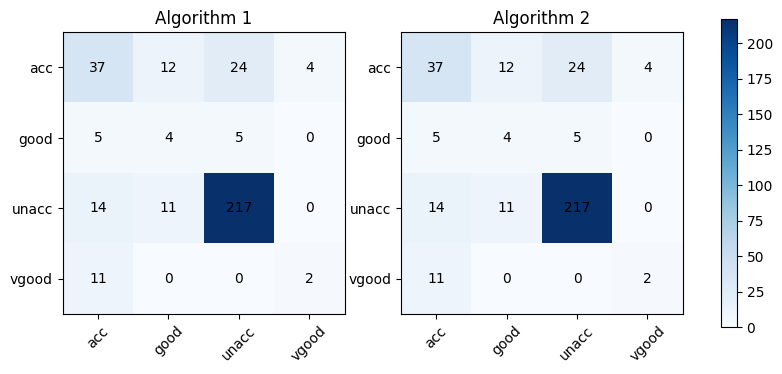

In [110]:
# Code below was generated using ChatGPT 5-mini using the prompt: can you generate a simple confusion matrix from the results of the two algorithms


import numpy as np
from sklearn.metrics import confusion_matrix

# compute confusion matrices and plot them side-by-side
import matplotlib.pyplot as plt

labels = sorted(y.unique())  # consistent label order
cm1 = confusion_matrix(yTest, yPredAlgo1, labels=labels)
cm2 = confusion_matrix(yTest, yPredAlgo2, labels=labels)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for ax, cm, title in zip(axes, (cm1, cm2), ("Algorithm 1", "Algorithm 2")):
    im = ax.imshow(cm, cmap="Blues", interpolation="nearest")
    ax.set_title(title)
    ax.set_xticks(range(len(labels)))
    ax.set_yticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticklabels(labels)
    for i in range(len(labels)):
        for j in range(len(labels)):
            ax.text(j, i, cm[i, j], ha="center", va="center")
fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()
